# Régression

* modéliser des relations statistiques entre deux variables

* estimer l'impact de la variation d'une variable explicative sur une variable à expliquer

* modèle : $y = f(x) + \epsilon$, où $x$ est une variable explicative (entrée), $y$ est une réponse (sortie) et $\epsilon$ un terme d'erreur.

# Partie I : Données simulées

## I.1. Régression linéaire

* $f(x) = \langle x, \beta \rangle$

* estimer le vecteur de paramètre $\beta$

a) Générer $n$ données suivant le modèle : $y_i = \beta_0 + \beta_1 x_i + \epsilon_i, i=1,\ldots,n$, avec $n=100$. Afficher les données.

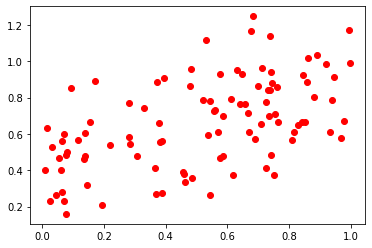

In [ ]:
import numpy as np
from matplotlib.pyplot import *

def linear(n,d):
  epsilon = np.random.normal(0,0.2,(n,1)) #if var is high then lot of error, if low error close to mean (0) and therefore y = b0 + b1*x linear
  X=np.append(np.random.rand(n,d),np.ones((n,1)),axis=1) #add one column of 1 + axis=1 mean that we a concatening the first line of each element, element must have the same number of array and axis
  beta = np.random.rand(d+1,1) # the +1 for d is the constant term b0, it will be multiplied of the 1 in X then added flat
  Y=X.dot(beta)+epsilon #dot is matrix mulplier
  return Y,X,beta

Y,X,beta = linear(100,1)
plot(X[:,0],Y,'ro')
show()


b) Calculer la solution obtenue par une régression linéaire à moindres carrés. Tracer la droite de régression obtenue.

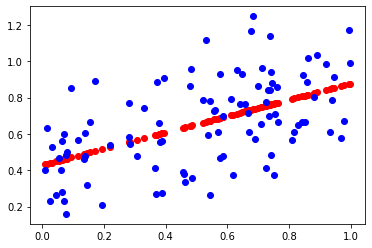

In [ ]:
Xtrans = X.transpose()
B = np.linalg.inv(Xtrans.dot(X))
alpha = B.dot(Xtrans.dot(Y))

plot(X[:,0],X[:,0]*alpha[0]+alpha[1],'ro')
plot(X[:,0],Y,'bo')
show()


## I.2. Régression non linéaire


a) Générer des données suivant le modèle : $y_i = \sin(\frac{x_i}{10}) +(\frac{x_i}{50})^2 + \epsilon $, avec $x_i = i$. Afficher les données.

In [ ]:
import numpy as np

from matplotlib.pyplot import *

def linear2(n):
  epsilon = np.random.normal(0,0.2,(n,1))
  X = np.arange(n)
  S = np.zeros((n,1))
  C = np.zeros((n,1))
  for i in range(0,n-1):
      S[i,0] = np.sin(X[i]/10)
      C[i,0] = (X[i]/50)**2
  Y = S+C+epsilon
  return Y
  # plot(X,Y,'ro')
  # show()

Ysin = linear2(100)


### I.2.1. Régression polynomiale

* $y = \beta_0 + \beta_1 x + \beta_2 x^2 +\beta_3 x^3$

* La solution d'une régression linéaire : $\hat{\beta} = (X^\top X)^{-1} X^\top Y$

* Utiliser $X = [1 \ x \ x^2 \ x^3]$


a) Ecrire une fonction qui retourne la solution de la régression linéaire multiple.

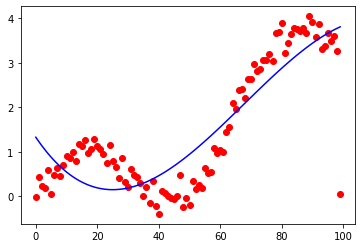

In [ ]:
def reg_lin(X,Y):
  Xtrans = X.transpose()
  B = np.linalg.inv(Xtrans.dot(X))
  beta = B.dot(Xtrans.dot(Y))
  return beta

def linear3(n):
  U = np.ones(n)
  X = np.arange(n)
  X2 = [X[i]**2 for i in X]
  X3 = [X[i]**3 for i in X]
  Xfin = np.column_stack([U, X, X2, X3])
  Y = Xfin.dot(reg_lin(Xfin, Ysin))
  plot(X,Ysin,'ro')
  plot(X,Y,'b')
  show()
  return 

linear3(100)


b) Utilisant la fonction ci-dessus, estimer les paramètres du modèle de régression polynomiale et afficher la solution.

In [ ]:
# A compléter

###I.2.2 Régression à noyau

a) Dans le cas du modèle linéaire, appliquer la régression à noyau avec un noyau linéaire. Utiliser la fonction KernelRidge de Scikit-learn avec un noyau linéaire. Reptrésenter sur un graphique les données et la solution obtenue.

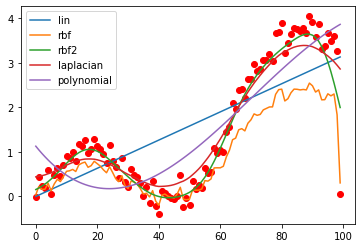

In [ ]:
from sklearn.kernel_ridge import KernelRidge 
import numpy as np

#Modélisation non linéaire auquelle on rajoute une pénalité Ridge
#Kernel possible : RBF, laplacian, polynomial, exponential chi2 and sigmoid kernels

X = np.arange(100)

#1
model_lin = KernelRidge(kernel='linear',alpha=1)
model_lin.fit(X[:,None],Ysin)

#2
model_rbf = KernelRidge(kernel='rbf',alpha=1,gamma=1)
model_rbf.fit(X[:,None],Ysin)

#3
model_rbf2 = KernelRidge(kernel='rbf',alpha=1,gamma=0.01)
model_rbf2.fit(X[:,None],Ysin)

#4
model_laplacian = KernelRidge(kernel='laplacian',alpha=1,gamma=0.01)
model_laplacian.fit(X[:,None],Ysin)

#5
model_poly = KernelRidge(kernel='polynomial',alpha=1,gamma=0.01)
model_poly.fit(X[:,None],Ysin)

plot(X,Ysin,'ro')
plot(X,model_lin.predict(X[:,None]),label='lin')
plot(X,model_rbf.predict(X[:,None]),label='rbf')
plot(X,model_rbf2.predict(X[:,None]),label='rbf2')
plot(X,model_laplacian.predict(X[:,None]),label='laplacian')
plot(X,model_poly.predict(X[:,None]),label='polynomial')
legend()

b) Dans le cas du modèle non-linéaire, appliquer la régression à noyau avec un noyau rbf. Représenter sur un graphique les données et la solution obtenue. 

In [4]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv


# Partie II : Données réelles

Soit les données suivantes : https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#

La régression ridge et lasso sont des extensions de la régression linéaire par moindres carrés permettant d'éviter le risque de sur-apprendtissage. L'idée est d'ajouter une pénalisation au problème de régression par moindres carrés:
$$ \arg\min_{w\in\mathbb{R}^d, b\in\mathbb{R}} \sum_{i=1}^n \big(y_i - \langle w, x_i \rangle-b\big)^2 + \lambda \Omega(w),$$
où $\lambda\in\mathbb{R}$ est un paramètre de régularisation, $\Omega(w) = \|w\|_2^2$ pour la régression ridge et $\Omega(w) = \|w\|_1$ pour le Lasso.

a) Utilisant la bibliothèque Scikit-learn, appliquez la régression Ridge et la régression Lasso sur le jeu de données "Bike Sharing". Affichez et comparez les deux solutions obtenues.

In [44]:
import pandas as pd
from IPython.display import display
data = pd.read_csv('day.csv')

print(data.info())
print(data.head())
display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
   instant      dteday  season  yr  ...  windspeed  casual  registered   cnt
0        1 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


[   95.51775331  -527.16330025    59.41779702   124.43491554
  -559.5485081   3102.52516707  3156.19574728 -1843.91223477
 -2679.97313256]
[   93.53384735  -512.02227928    58.66557365   116.06037753
  -503.68716556  2454.19145496  4028.16845277 -2138.32437865
 -3198.83576625]
<class 'pandas.core.frame.DataFrame'>


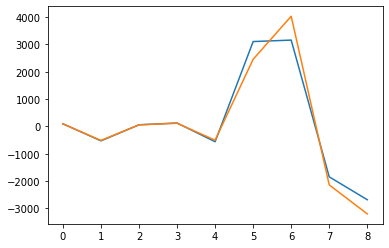

In [45]:
from sklearn.linear_model import Ridge, Lasso, Least
import matplotlib.pyplot as plt

Ydata = data['cnt']
Xdata = data.iloc[:,4:13]
ridge = Ridge()
ridge.fit(Xdata,Ydata)
lasso = Lasso()
lasso.fit(Xdata, Ydata)
print(ridge.coef_)
print(lasso.coef_)
print(type(Xdata))
Y_lasso = lasso.predict(Xdata)

plt.plot(ridge.coef_)
plt.plot(lasso.coef_)
# plt.plot(Xdata,Ydata,'ro')
# plt.plot(Xdata,Y_lasso,'bo')


b) Calculez les erreurs de prédiction sur les données d'apprentissage obtenues avec les régressions Ridge et Lasso (utiliser la valeur par défaut de Scikit-learn pour le paramètre de régularisation). Comparez les résultats avec ceux obtenus par la régression par moindre carrés.

In [40]:
Y_lasso = lasso.predict(Xdata)
print("Erreur moyenne Lasso:",np.linalg.norm((Ydata - Y_lasso)/np.sqrt(Ydata)))


Erreur moyenne Lasso: 841.7763225852751


c)  Le choix du paramètre $\lambda$ est primordial pour avoir des résultats de prédiction optimaux. Une façon de procéder pour trouver une bonne valeur $\lambda$ est d'utiliser la méthode de cross-validation sur une grille de valeurs. Déterminer par cross-validation les valeurs de $\lambda$ permettant d'avoir les meilleurs taux de prédiction. 



In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xdata,Ydata, test_size = 0.3) # 30% de données pour test
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

models = {'ridge' : ridge, 'lasso' : lasso}
for k,model in models.items():
  model.fit(X_train, Y_train)
  Y_est = model.predict(X_test)
  print('Erreur moyenne',k,":",np.linalg.norm((Y_est - Y_test)/ np.sqrt(Y_test.shape)))

(511, 9) (511,) (220, 9) (220,)
Erreur moyenne ridge : 1356.0397693876569
Erreur moyenne lasso : 1376.2224496646127
